In [1]:
from keras import layers
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [80]:
# Обработка меток
import os
! unzip /content/drive/MyDrive/Colab\ Notebooks/aclImdb.zip
imdb_dir = "/content/aclImdb"

train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: aclImdb/train/pos/9260_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._9260_7.txt  
  inflating: aclImdb/train/pos/1599_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._1599_7.txt  
  inflating: aclImdb/train/pos/2174_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2174_8.txt  
  inflating: aclImdb/train/pos/2309_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2309_9.txt  
  inflating: aclImdb/train/pos/12034_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._12034_10.txt  
  inflating: aclImdb/train/pos/11703_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._11703_9.txt  
  inflating: aclImdb/train/pos/5619_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._5619_9.txt  
  inflating: aclImdb/train/pos/2928_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2928_10.txt  
  inflating: aclImdb/train/pos/7096_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7096_10.txt  
  inflating: aclImdb/train/pos/

In [81]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequense = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('word_index ', word_index)

data = pad_sequences(sequense, maxlen=maxlen)

labels = np.asarray(labels)
print("shape of data ", data.shape)
print("shape of tensor", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

word_index  {'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'for': 15, 'with': 16, 'movie': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'are': 23, 'his': 24, 'have': 25, 'he': 26, 'be': 27, 'one': 28, 'all': 29, 'at': 30, 'by': 31, 'an': 32, 'they': 33, 'who': 34, 'so': 35, 'from': 36, 'like': 37, 'her': 38, 'or': 39, 'just': 40, 'about': 41, "it's": 42, 'out': 43, 'if': 44, 'has': 45, 'some': 46, 'there': 47, 'what': 48, 'good': 49, 'more': 50, 'when': 51, 'very': 52, 'up': 53, 'no': 54, 'time': 55, 'she': 56, 'even': 57, 'my': 58, 'would': 59, 'which': 60, 'only': 61, 'story': 62, 'really': 63, 'see': 64, 'their': 65, 'had': 66, 'can': 67, 'were': 68, 'me': 69, 'well': 70, 'than': 71, 'we': 72, 'much': 73, 'been': 74, 'bad': 75, 'get': 76, 'will': 77, 'do': 78, 'also': 79, 'into': 80, 'people': 81, 'other': 82, 'first': 83, 'great': 84, 'because': 85, 'how': 86, 'him': 87, 'most': 

In [5]:
import os
import numpy as np

# считываем данные Glove

glove_dir = "/content/drive/MyDrive/Colab Notebooks/glove/"
embedding_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embedding_index[word] = coefs
f.close()

print('len embedding_index ', len(embedding_index))

len embedding_index  400000


In [111]:
# Подготовка матрицы векторных представлений Glove
max_words = 10000
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.038194   -0.24487001  0.72812003 ... -0.1459      0.82779998
   0.27061999]
 [-0.071953    0.23127     0.023731   ... -0.71894997  0.86894
   0.19539   ]
 ...
 [ 0.09512     0.43186    -0.11889    ... -0.54712999 -0.89349997
  -0.56369001]
 [ 0.80053002  0.78290999 -0.34737    ...  0.32482001 -0.091635
  -0.080588  ]
 [-0.25373    -0.88200998 -0.068905   ... -0.092328    0.026667
  -0.17737   ]]


Так как у тас текст, а не изображения и т.д. я выбрал одномерные сверночные сети, для теста сделал 2 модели с 1 уровнем свертки с и без Glove

In [108]:
import tensorflow as tf
embedding_dim = 100

#вариант 1 CNN модели 1 основан на статье https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/
#без glove
model = Sequential()

model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(tf.keras.layers.Conv1D(32, 8, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())


# Fit model
history = model.fit(x_train, y_train,
                    epochs=15,
                    verbose=True,
                    validation_data=(x_val, y_val),
                    batch_size=10)

model.save_weights('/content/drive/MyDrive/Colab Notebooks/model1.h5')

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_72 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
conv1d_151 (Conv1D)          (None, 93, 32)            25632     
_________________________________________________________________
max_pooling1d_96 (MaxPooling (None, 46, 32)            0         
_________________________________________________________________
global_max_pooling1d_43 (Glo (None, 32)                0         
_________________________________________________________________
flatten_55 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 10)                330       
_________________________________________________________________
dense_111 (Dense)            (None, 1)               

In [109]:
model = Sequential()
#вариант 2 таже модель, но довавляем слой glove
model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(tf.keras.layers.Conv1D(32, 8, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Fit model
history2 = model.fit(x_train, y_train,
                    epochs=15,
                    verbose=True,
                    validation_data=(x_val, y_val),
                    batch_size=10)

model.save_weights('/content/drive/MyDrive/Colab Notebooks/model2.h5')

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_73 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
conv1d_152 (Conv1D)          (None, 93, 32)            25632     
_________________________________________________________________
max_pooling1d_97 (MaxPooling (None, 46, 32)            0         
_________________________________________________________________
global_max_pooling1d_44 (Glo (None, 32)                0         
_________________________________________________________________
flatten_56 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_112 (Dense)            (None, 10)                330       
_________________________________________________________________
dense_113 (Dense)            (None, 1)               

range(1, 16) [0.49000000953674316, 0.6349999904632568, 0.8450000286102295, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


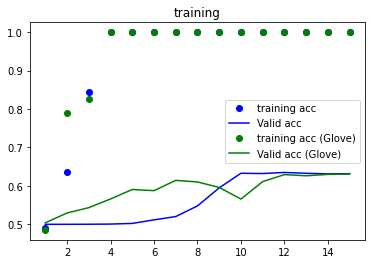

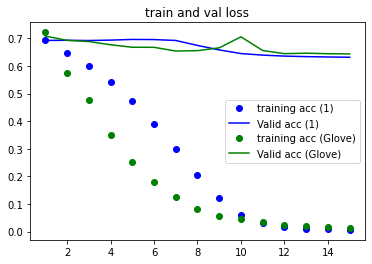

In [110]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

print(epochs, acc)
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='Valid acc')
plt.plot(epochs, acc2, 'bo', label='training acc (Glove)',color='green')
plt.plot(epochs, val_acc2, 'b', label='Valid acc (Glove)',color='green')
plt.title('training')
plt.legend()




epochs = range(1, len(acc) + 1)


plt.figure()

plt.plot(epochs, loss, 'bo', label='training acc (1)')
plt.plot(epochs, val_loss, 'b', label='Valid acc (1)')
plt.plot(epochs, loss2, 'bo', label='training acc (Glove)',color='green')
plt.plot(epochs, val_loss2, 'b', label='Valid acc (Glove)',color='green')
plt.title("train and val loss")
plt.legend()

plt.show()

Сравнил модели с и без Glove, как видно из графиков что когда используем предобучение модель обучается быстрее, что логично) но в целом точности достигаем той же, прежде всего я думаю это связанно с тем что мы класицифируем данные по я признаку, на положительные и негативные.
